In [1]:
import pandas as pd
import plotly.express as px
import glob
import os.path
from datetime import datetime
import pytz

utc=pytz.UTC

In [2]:
start = datetime(2021, 4, 14, 14, 2, 30, tzinfo=pytz.UTC)
end = datetime(2021, 4, 14, 14, 55, 43, tzinfo=pytz.UTC)

dfs = []

for path in glob.glob("tRackIT/raw/*.csv"):
    _, fname = os.path.split(path)
    if fname.endswith("-matched.csv"):
        continue
    station, ts = fname.split("_")
    
    df = pd.read_csv(path, sep=';', parse_dates=["Time"])
    df["Station"] = station
    df["Frequency (MHz)"] = df["Frequency"] / 1000 / 1000
    df["Device"] = df["Device"].replace({0: "North", 1: "East", 2: "South", 3: "West"})
    df = df.dropna()
    dfs.append(df)

dfs[0]

Device                             Time     Frequency  Duration  \
0       South 2021-04-14 13:35:08.161139+00:00  1.501723e+08  0.017920   
1        East 2021-04-14 13:35:08.157336+00:00  1.501723e+08  0.017920   
2        West 2021-04-14 13:35:08.183497+00:00  1.501723e+08  0.017920   
3       North 2021-04-14 13:35:08.151539+00:00  1.501723e+08  0.018773   
4       North 2021-04-14 13:35:09.149939+00:00  1.501723e+08  0.017920   
...       ...                              ...           ...       ...   
267712   East 2021-04-15 10:19:47.390845+00:00  1.500012e+08  0.011947   
267713  North 2021-04-15 10:19:47.354328+00:00  1.500012e+08  0.010240   
267714   East 2021-04-15 10:19:47.389992+00:00  1.500012e+08  0.025600   
267715   East 2021-04-15 10:19:47.436925+00:00  1.500012e+08  0.009387   
267716   East 2021-04-15 10:19:51.070421+00:00  1.501781e+08  0.008533   

        max (dBW)  avg (dBW)  std (dB)  noise (dBW)   snr (dB)        Station  \
0      -67.578615 -68.404823  7.823079   -82.187350  13.782528  mof-rts-00015   
1      -53.452966 -54.147354  4.872084   -68.003745  13.856391  mof-rts-00015   
2      -74.034064 -75.377528  4.657518   -88.766040  13.388512  mof-rts-00015   
3      -71.091726 -72.173585  6.480860   -87.256359  15.082774  mof-rts-00015   
4      -70.822112 -72.166123  5.420390   -85.712286  13.546163  mof-rts-00015   
...           ...        ...       ...          ...        ...            ...   
267712 -69.634981 -70.227913  0.352638   -73.531991   3.304078  mof-rts-00015   
267713 -86.305827 -87.167045  0.516852   -90.737166   3.570122  mof-rts-00015   
267714 -69.634981 -70.352365  0.360899   -74.098229   3.745864  mof-rts-00015   
267715 -70.153518 -70.647264  0.331157   -74.098229   3.450965  mof-rts-00015   
267716 -84.538646 -88.207636  3.111637   -92.948911   4.741275  mof-rts-00015   

        Frequency (MHz)  
0            150.172266  
1            150.172266  
2            150.172266  
3            150.172266  
4            150.172266  
...                 ...  
267712       150.001172  
267713       150.001172  
267714       150.001172  
267715       150.001172  
267716       150.178125  

[267717 rows x 11 columns]

In [3]:
df = pd.concat(dfs)

Experiment duration: 0:53:13
Signals sent: 3193.0
Maximal observed count: 63860.0
Observed signals: 30507


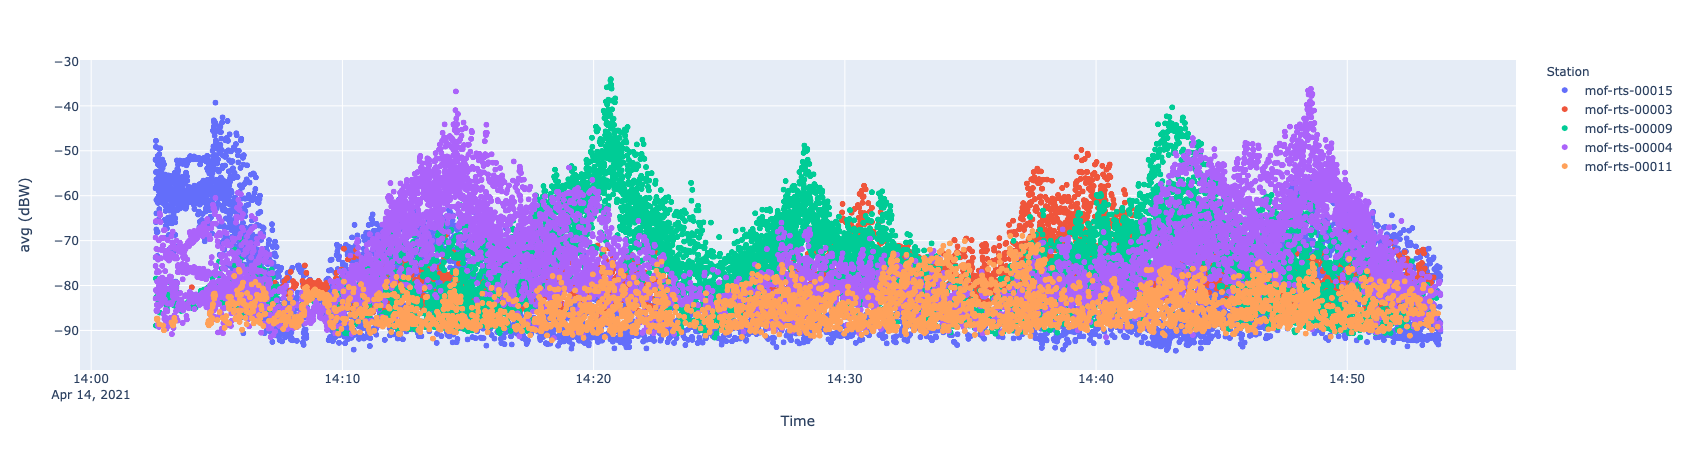

In [4]:
select_df = df[
    (df["Frequency (MHz)"] > 150.172) & 
    (df["Frequency (MHz)"] < 150.174) &
    (df["Time"] > start) &
    (df["Time"] < end)
]

signals_per_s = 1.0
runtime = end - start

print(f"Experiment duration: {runtime}")
print(f"Signals sent: {runtime.total_seconds()*signals_per_s}")
print(f"Maximal observed count: {runtime.total_seconds()*signals_per_s * 4 * 5}")
print(f"Observed signals: {len(select_df)}")

fig = px.scatter(
    select_df, 
    x="Time",
    y="avg (dBW)",
    color="Station",
)
fig.show()

In [5]:
recv_df = select_df.groupby(["Station","Device"]).count()
recv_df

Time  Frequency  Duration  max (dBW)  avg (dBW)  \
Station       Device                                                    
mof-rts-00003 East     321        321       321        321        321   
              North    789        789       789        789        789   
              South    447        447       447        447        447   
              West    1742       1742      1742       1742       1742   
mof-rts-00004 East    2582       2582      2582       2582       2582   
              North   2148       2148      2148       2148       2148   
              South   1539       1539      1539       1539       1539   
              West    1779       1779      1779       1779       1779   
mof-rts-00009 East    2117       2117      2117       2117       2117   
              North   1936       1936      1936       1936       1936   
              South   2611       2611      2611       2611       2611   
              West    2035       2035      2035       2035       2035   
mof-rts-00011 East     208        208       208        208        208   
              North     95         95        95         95         95   
              South   1923       1923      1923       1923       1923   
              West    1430       1430      1430       1430       1430   
mof-rts-00015 East    1443       1443      1443       1443       1443   
              North   2423       2423      2423       2423       2423   
              South   1345       1345      1345       1345       1345   
              West    1594       1594      1594       1594       1594   

                      std (dB)  noise (dBW)  snr (dB)  Frequency (MHz)  
Station       Device                                                    
mof-rts-00003 East         321          321       321              321  
              North        789          789       789              789  
              South        447          447       447              447  
              West        1742         1742      1742             1742  
mof-rts-00004 East        2582         2582      2582             2582  
              North       2148         2148      2148             2148  
              South       1539         1539      1539             1539  
              West        1779         1779      1779             1779  
mof-rts-00009 East        2117         2117      2117             2117  
              North       1936         1936      1936             1936  
              South       2611         2611      2611             2611  
              West        2035         2035      2035             2035  
mof-rts-00011 East         208          208       208              208  
              North         95           95        95               95  
              South       1923         1923      1923             1923  
              West        1430         1430      1430             1430  
mof-rts-00015 East        1443         1443      1443             1443  
              North       2423         2423      2423             2423  
              South       1345         1345      1345             1345  
              West        1594         1594      1594             1594

In [6]:
df["Device"] = df["Device"].replace({0: "north", 1: "east", 2: "south", 3: "west"})
df

Device                              Time     Frequency  Duration  \
0       South  2021-04-14 13:35:08.161139+00:00  1.501723e+08  0.017920   
1        East  2021-04-14 13:35:08.157336+00:00  1.501723e+08  0.017920   
2        West  2021-04-14 13:35:08.183497+00:00  1.501723e+08  0.017920   
3       North  2021-04-14 13:35:08.151539+00:00  1.501723e+08  0.018773   
4       North  2021-04-14 13:35:09.149939+00:00  1.501723e+08  0.017920   
...       ...                               ...           ...       ...   
379524  North  2021-04-15 07:55:48.676165+00:00  1.500504e+08  0.034133   
379525   East  2021-04-15 07:55:48.648330+00:00  1.500504e+08  0.034133   
379526  South  2021-04-15 07:55:48.646893+00:00  1.500504e+08  0.034987   
379527   West  2021-04-15 07:55:48.602537+00:00  1.501008e+08  0.017920   
379528   West  2021-04-15 07:55:49.782698+00:00  1.501008e+08  0.017920   

        max (dBW)  avg (dBW)  std (dB)  noise (dBW)   snr (dB)        Station  \
0      -67.578615 -68.404823  7.823079   -82.187350  13.782528  mof-rts-00015   
1      -53.452966 -54.147354  4.872084   -68.003745  13.856391  mof-rts-00015   
2      -74.034064 -75.377528  4.657518   -88.766040  13.388512  mof-rts-00015   
3      -71.091726 -72.173585  6.480860   -87.256359  15.082774  mof-rts-00015   
4      -70.822112 -72.166123  5.420390   -85.712286  13.546163  mof-rts-00015   
...           ...        ...       ...          ...        ...            ...   
379524 -75.196815 -76.600084  1.519802   -87.266762  10.666678  mof-rts-00011   
379525 -69.696279 -70.460682  1.326771   -81.446865  10.986183  mof-rts-00011   
379526 -66.750605 -67.490774  5.426191   -78.405394  10.914620  mof-rts-00011   
379527 -82.060484 -84.434441  2.591579   -94.583819  10.149377  mof-rts-00011   
379528 -79.443075 -81.381094  5.232764   -92.898239  11.517145  mof-rts-00011   

        Frequency (MHz)  
0            150.172266  
1            150.172266  
2            150.172266  
3            150.172266  
4            150.172266  
...                 ...  
379524       150.050391  
379525       150.050391  
379526       150.050391  
379527       150.100781  
379528       150.100781  

[1600695 rows x 11 columns]

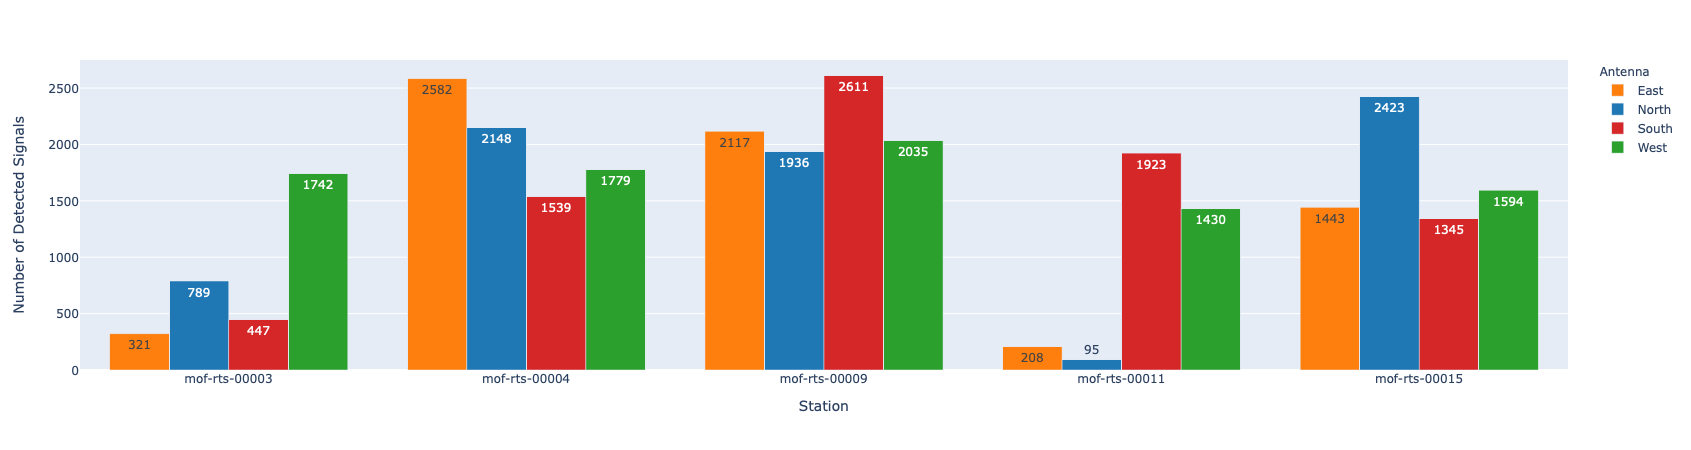

In [7]:
fig = px.bar(
    recv_df.reset_index(),
    x="Station",
    y="Time",
    color="Device",
    barmode='group',
    text="Time",
    labels={"Time": "Number of Detected Signals", "Device": "Antenna"},
    color_discrete_map={
        "East": "#ff7f0e", 
        "North": "#1f77b4", 
        "West": "#2ca02c", 
        "South": "#d62728", 
    },
)
fig.write_image(
    "fig/station_receiving.pdf",
    width=700,
    height=300,
)
fig